# Bootstrap and Monte Carlo

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats 

## Problem:
Using the following sample data: 4.94, 5.06, 4.53, 5.07, 4.99, 5.16, 4.38, 4.43, 4.93, 4.72, 4.92, 4.96 <br>
a) Compute the mean and its standard error (from the standard deviation) and the median. <br>
b) Compute bootstrap estimates of the mean and median with estimates of their standard errors, using B = 1000 resamples. Also compute the median of the median estimates. <br>
c) Compare the results of parts a) and b). <br>



Solve:

(a) Use numpy library to compute statistical parameters:

In [2]:
data=[4.94, 5.06, 4.53, 5.07, 4.99, 5.16, 4.38, 4.43, 4.93, 4.72, 4.92, 4.96]
print ("mean  :",np.mean(data))
print ("std   :",np.std(data))
print ("median:",np.median(data))

mean  : 4.84083333333
std   : 0.250880394256
median: 4.935


(b) Using bootstrap estimations:

In [3]:
# Sample size
n = len(data)
# Bootstrap resamples
B = 1000
# Sample mean list
mean = np.empty(B)
std =np.empty(B)
med =np.empty(B)
# 1000 bootstrap samples of size n
for i in range(B):
    random_sample=np.random.choice(data,n)
    sample_mean=np.mean(random_sample)
    sample_std=np.std(random_sample)
    sample_med=np.median(random_sample)
    
    mean[i]=sample_mean
    std[i]=sample_std
    med[i]=sample_med

print("Bootstrap estimated mean  : ", np.mean(mean))
print("Bootstrap estimated std   : ", np.mean(std))
print("Bootstrap estimated median: ", np.mean(med))

Bootstrap estimated mean  :  4.840055
Bootstrap estimated std   :  0.236772492946
Bootstrap estimated median:  4.91015


(c) By comparing the result from raw data and their bootstrap resampling estimation:<br>
For original data: <br>
&emsp;&emsp; mean=4.84033; standard derviation=0.25088; median=4.93500<br>
For Bootstrap sampled data:<br>
&emsp;&emsp; mean=4.84293; standard derviation=0.23551; median=4.91074<br>
which highly matched with each other, so it can be considered a good estimation.<br>


## Problem:
Outliers can strongly influence statistics such as the mean and the least-squares line. The following data contains a low outlier in the value 29.12: 
41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33, 40.61, 40.49, 41.77, 42.07, 44.83, 29.12, 45.59, 41.95, 45.78, 42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 39.63, 38.52, 38.52, 43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35, 45.18, 39.67, 43.89, 43.89, 42.16. <br>
a) Generate a boxplot of the data to identify 29.12 as an outlier. <br>
b) Bootstrap the data and obtain bootstrap mean with and without the outlier. Plot histograms of the resampling distributions of the bootstrap means. How does the outlier influence the shape and bias of the bootstrap distribution? <br>
c) Find 95% confidence intervals for the population mean from both bootstrap distributions. Discuss the differences. <br>


(a) By simply using boxplot method in matplotlib:

{'boxes': [<matplotlib.lines.Line2D at 0x6b417550>],
 'caps': [<matplotlib.lines.Line2D at 0x6b3a8510>,
 'fliers': [<matplotlib.lines.Line2D at 0x6b3ac9d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x6b3ac910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x6b417510>,
  <matplotlib.lines.Line2D at 0x6b417e10>]}

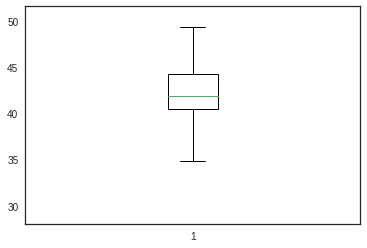

In [4]:
data=[41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33, 40.61, 40.49, 41.77, 42.07, 44.83, 29.12, 45.59, 41.95, 45.78, 42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 39.63, 38.52, 38.52, 43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35, 45.18, 39.67, 43.89, 43.89, 42.16]
plt.boxplot(data)

As shown, the data point 29.12 located far away from the major range of the distribution of this data set, which can be regarded as a outlier.

(b) Now bootstrap the data set, I randomly resample the data set, with the same length of the original data, return the mean of the each sample set, and plot the histogram of bootstrap mean.
$$ $$
with the outlier 29.12:

Bootstrap estimated mean: 42.17062475


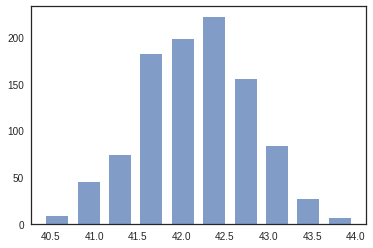

In [5]:
n = len(data)
B = 1000

mean1 = np.empty(B)
for i in range(B):
    random_sample1=np.random.choice(data,n)
    sample_mean1=np.mean(random_sample1)    
    mean1[i]=sample_mean1    

plt.hist(mean1,rwidth=0.7,alpha=0.7)
print("Bootstrap estimated mean:",np.mean(mean1))

without the outlier: 29.12:

Bootstrap estimated mean: 42.53463425


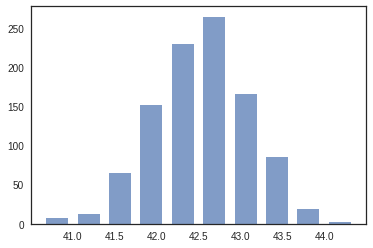

In [6]:
data1=[41.28, 45.16, 34.75, 40.76, 43.61, 39.05, 41.20, 41.02, 41.33, 40.61, 40.49, 41.77, 42.07, 44.83, 45.59, 41.95, 45.78, 42.89, 40.42, 49.31, 44.01, 34.87, 38.60, 39.63, 38.52, 38.52, 43.95, 49.08, 50.52, 43.85, 40.64, 45.86, 41.25, 50.35, 45.18, 39.67, 43.89, 43.89, 42.16]
n2 = len(data1)

mean2 = np.empty(B)
for i in range(B):
    random_sample2=np.random.choice(data1,n)
    sample_mean2=np.mean(random_sample2)    
    mean2[i]=sample_mean2 

plt.hist(mean2,rwidth=0.7,alpha=0.7)
print("Bootstrap estimated mean:",np.mean(mean2))

Thus, by camparing the distribution of the bootstrap mean in which cases with and without outlier:<br>
&emsp;&emsp;(i) the outlier 29.12 influenced the bootstrap mean by a certain degree, which decreased the mean by almost 0.3 (from 42.5135 to 42.1936); <br>
&emsp;&emsp;(ii) the outlier influenced the distribution of the bootstrap mean, in a situation which sharpen the distribution near the histogram peak area in terms of the distrubution graph shape.<br>

(c) 95% confidence intervals for the population mean from both bootstrap distributions:

In [7]:
Confidence=95
C_low=(100-Confidence)/2
C_high=100-C_low
C_interval1=np.percentile(mean1,[C_low,C_high])
C_interval2=np.percentile(mean2,[C_low,C_high])

print('95% CI(with Outlier):',C_interval1,'; Interval=',C_interval1[1]-C_interval1[0])
print('95% CI(no Outliter) :',C_interval2,'; Interval=',C_interval1[1]-C_interval1[0])

95% CI(with Outlier): [ 40.926525  43.335075] ; Interval= 2.40855
95% CI(no Outliter) : [ 41.4290875   43.59285625] ; Interval= 2.40855


The Confidence Interval can be expressed as 'shifted' a little to the direction which is pointing to the outlier. However, the length of the CI remains the same; <br> 
The differences between the cases which involves outlier or not indicates: Only one single outlier could influenced the distribution of the Bootstrap mean, which includes the the mean value, the confidence intervals.

## Problem:

Implement code in Python using the sample code on Bright Space (Monte Carlo Code Example.ipynb) so that you reproduce figures  3.6-3.8 and results that correspond to these figures from the book Understanding Computational Bayesian Statistics. Please make sure that you read whole chapter 3 from the book. <br>
a)Use acceptance-rejection sampling as explained in the book Understanding Computational Bayesian Statistics on page 54. <br>
b)Use importance sampling from Monte Carlo Code Example.ipynb.<br>


(a) Acceptance-Rejection Sampling: find a constant $M$ such that $f_X \leq M g$ where $g$ is the proposal distribution. We want $M$ to be as small as possible. but in this case I will simply pick the $M$ based on visualizations.

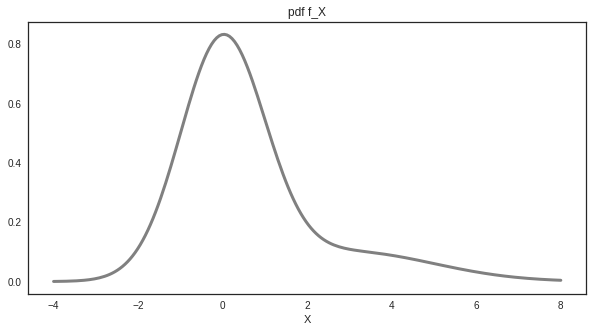

functools.partial(<function normal_dist at 0x6b2686a8>, mu=0, sigma=2.7)
functools.partial(<function uniform_dist at 0x6b2f1270>, a=-4, b=8)


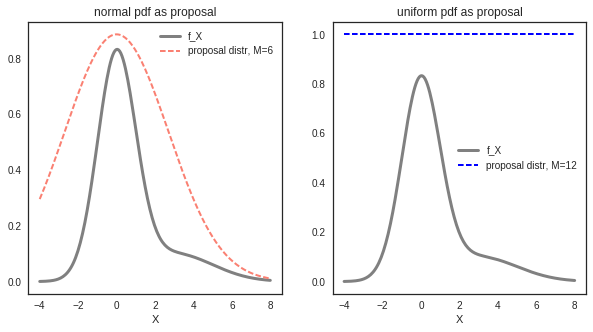

Rejection Sampling estimate of E[h(x)] (using normal): 0.07230929896881355


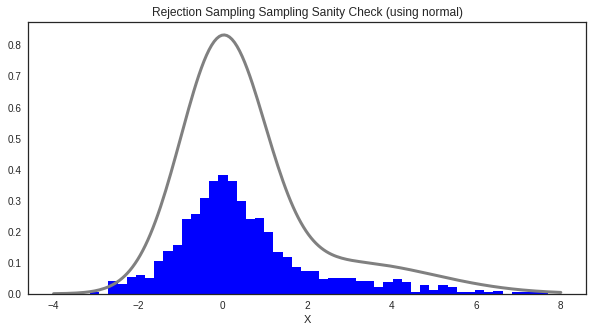

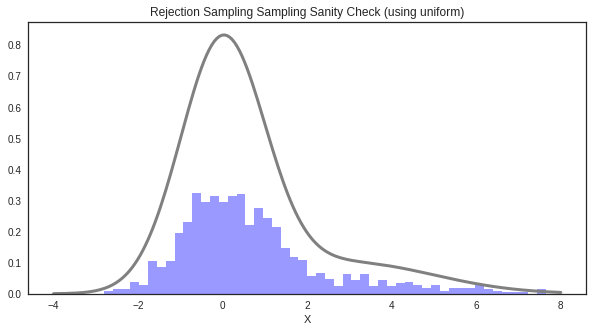

Rejection Sampling estimate of E[h(x)] (using uniform): 0.07141761984973469


In [8]:
from functools import partial
from scipy.stats import norm

def f_X(x):
    A = 0.8*np.exp(-(x)**2/2)
    B = 0.1*np.exp(-(x-3)**2/8)
    return A+B

#visualize pdf
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(-4, 8, 200)
ax.plot(x, list(map(f_X, x)), color='gray', linewidth=3)
ax.set_xlabel('X')
ax.set_title('pdf f_X')
plt.show()

#setting up proposal distributions, normal pdf: for sampling and evaluation
def normal_dist(mu, sigma, x=None, n=None):
    if x is not None:
        return norm.pdf(x, mu, sigma)
    elif n is not None:
        return np.random.normal(mu, sigma, n)
    else:
        return None
    
def uniform_dist(a, b, x=None, n=None):
    if x is not None:
        return np.array([1 / (b - a)] * len(x))
    elif n is not None:
        return np.random.uniform(a, b, n)
    else:
        return None
    
prop = partial(normal_dist, mu=0, sigma=2.7)
M = 6

prop1 = partial(uniform_dist, a=-4, b=8)
M1 = 12


n_samples = 1000

print(prop)
print(prop1)

def h(x):
    return 1/(2.7 * 2**.5 * np.pi) * np.exp(-1*(x)**2/(2*2.7**2))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 5))
ax1.plot(x, list(map(f_X, x)), color='gray', linewidth=3, label='f_X')
ax1.plot(x, M * prop(x=x), '--', color='salmon', linewidth=2, label='proposal distr, M={}'.format(M))
ax1.set_xlabel('X')
ax1.set_title('normal pdf as proposal')
ax1.legend(loc='best')
ax2.plot(x, list(map(f_X, x)), color='gray', linewidth=3, label='f_X')
ax2.plot(x, M1 * prop1(x=x), '--', color='blue', linewidth=2, label='proposal distr, M={}'.format(M1))
ax2.set_xlabel('X')
ax2.set_title('uniform pdf as proposal')
ax2.legend(loc='best')
plt.show()

# Reject sampling
def rejection(n, prop_dist, M, true_dist, h):
    samples = []
    while len(samples) < n:
        sample = prop_dist(n=1)
        if np.random.uniform(0, M * prop_dist(x=sample)) <= true_dist(sample):
            samples.append(sample[0])    
    mean_rej = np.mean(list(map(h, samples)))
    return samples, mean_rej

x_samples, mean_rej = rejection(n_samples, prop, M, f_X, h)
fig, ax= plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, list(map(f_X, x)), color='gray', linewidth=3)
ax.hist(x_samples, bins=50, normed=1, color='blue', linewidth=0)
ax.set_xlabel('X')
ax.set_title('Rejection Sampling Sampling Sanity Check (using normal)')
print ('Rejection Sampling estimate of E[h(x)] (using normal): {}'.format(mean_rej)) 

x_samples, mean_rej = rejection(n_samples, prop1, M1, f_X, h)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
x=x = np.linspace(-4, 8, 200)
ax.plot(x, list(map(f_X, x)), color='gray', linewidth=3)
ax.hist(x_samples, bins=50, normed=1, color='blue', linewidth=0, alpha=0.4)
ax.set_xlabel('X')
ax.set_title('Rejection Sampling Sampling Sanity Check (using uniform)')
plt.show()
print ('Rejection Sampling estimate of E[h(x)] (using uniform): {}'.format(mean_rej))


(b) Use importance sampling from Monte Carlo Code Example.ipynb.<br>

In [9]:
def importance(n, prop_dist, f_X, h):
    samples = prop_dist(n=n)
    weights = np.multiply(list(map(f_X, samples)), prop_dist(x=samples)**-1.)
    mean_imp = np.mean(np.multiply(list(map(h, samples)), weights))
    return mean_imp

mean_imp = importance(n_samples, prop, f_X, h)
print ('Importance Sampling estimate of E[h(x)] (using uniform): {}'.format(mean_imp))

Importance Sampling estimate of E[h(x)] (using uniform): 0.17974661630291572


## Problem:
In order to determine that there is significant evidence at 98% level of confidence that the mean calcium level of two types of products differ by more than 5 units, independent analysis of these two products was done. 20 samples of the first products were tested and the following results were obtained: mean = 21.3 and standard deviation = 1.8. 15 samples of the second product were tested with the mean of 14.2 and standard deviation of 2.4. Measurements of both products follow normal distribution. <br>
To determine that one product has higher calcium level than the other at 98% confidence level is the same as determining if confidence intervals of difference of the means of the concentration levels of two products does not include value 5 at 98% level. Compute confidence level of the difference using the hint below and comment on if the difference is significant or not.
<br><br>

For A product: $\mu_A=21.3$, $\sigma_A=1.8/\sqrt20=0.40$ <br>
For B product: $\mu_B=14.2$, $\sigma_B=2.4/\sqrt15=0.62$ <br>
Therefore, I can say: $A$~$N(21.3,0.40)$, and $B$~$N(14.2,0.62)$, what I do next is computing the probabilistic expression of the difference between these two product: $P(|A-B|)$. Further, the confidence level of $P(|A-B|\leq5)$<br>
Using Bootstrap Resampling to compute the Confidence Interval:<br>

Mean(Mul) = 7.10
STD(Mul)  = 0.75


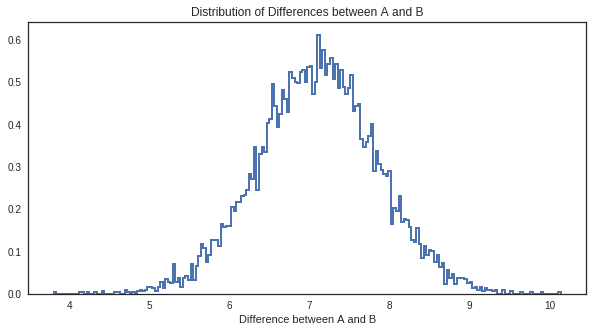

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

u_x=21.3
s_x=0.4

u_y=14.2
s_y=0.62

data_x= np.random.normal(loc=u_x, scale=s_x, size=10000)
data_y= np.random.normal(loc=u_y, scale=s_y, size=10000)

data=data_x-data_y

print('Mean(Mul) = {:.2f}'.format(data.mean()))
print('STD(Mul)  = {:.2f}'.format(data.std()))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.hist(data, bins=200, normed=True, histtype='step', lw=2)
ax.set_xlabel('Difference between A and B')
ax.set_title('Distribution of Differences between A and B')
plt.show()

Bootstrap estimated mean: 7.09982343618


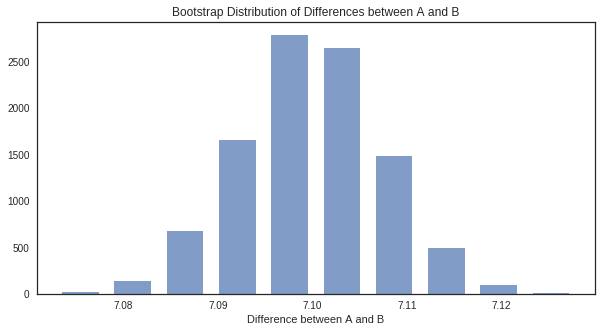

In [11]:
length = len(data)
B=10000
mean = np.empty(B)

for i in range(B):
    randn_sp=np.random.choice(data,length)
    sp_mean=np.mean(randn_sp)    
    mean[i]=sp_mean 

print("Bootstrap estimated mean:",np.mean(mean))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.hist(mean,rwidth=0.7,alpha=0.7)
#plt.hist(mean, bins=200, normed=True, histtype='step', lw=2)
ax.set_xlabel('Difference between A and B')
ax.set_title('Bootstrap Distribution of Differences between A and B')
plt.show()

Using Bootstrap resampling to compute the Confidence Interval:

In [12]:
Conf=98
C_low=(100-Conf)/2
C_high=100
C_itv=np.percentile(mean,[C_low,C_high])

print('98% CI:',C_itv,'; Interval=',C_itv[1]-C_itv[0])


98% CI: [ 7.08270646  7.12801815] ; Interval= 0.0453116868033


Therefore, I can make the decision that: the Confidence Intervals of difference of the means of the concentration levels of two products is 7.08899 units when comes with 98% CI level. 